# Coupon usage prediction on In-Vehicle Recommendation systems

# EDA

## Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Dataset

In [2]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.shape

(12684, 26)

In [4]:
# checking columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# check duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Length: 12684, dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


## Check null values

In [7]:
# checking data to see if null values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

destination - 0%
passanger - 0%
weather - 0%
temperature - 0%
time - 0%
coupon - 0%
expiration - 0%
gender - 0%
age - 0%
maritalStatus - 0%
has_children - 0%
education - 0%
occupation - 0%
income - 0%
car - 99%
Bar - 1%
CoffeeHouse - 2%
CarryAway - 1%
RestaurantLessThan20 - 1%
Restaurant20To50 - 1%
toCoupon_GEQ5min - 0%
toCoupon_GEQ15min - 0%
toCoupon_GEQ25min - 0%
direction_same - 0%
direction_opp - 0%
Y - 0%


In [8]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
df.isnull().sum().sum()

13370

The "car" column contains 12576 missing values, accounting for 99% of the column's total values. As a result, it will be removed because it has no effect on the dataset.

In [10]:
df = df.drop('car', axis = 1)

In [11]:
df.isnull().sum().sum()

794

In [12]:
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [13]:
#Percentage of total missing values 
round(df.isnull().sum().sum()*100/len(df))

6

Only 6% of the whole dataset is missing

## Label Encoding
Setting Dtype of all columns to integers

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
L_E = LabelEncoder()

for i in df.columns:
    df[i] = L_E.fit_transform(df[i])

In [16]:
# checking columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  int64
 1   passanger             12684 non-null  int64
 2   weather               12684 non-null  int64
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  int64
 5   coupon                12684 non-null  int64
 6   expiration            12684 non-null  int64
 7   gender                12684 non-null  int64
 8   age                   12684 non-null  int64
 9   maritalStatus         12684 non-null  int64
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  int64
 12  occupation            12684 non-null  int64
 13  income                12684 non-null  int64
 14  Bar                   12684 non-null  int64
 15  CoffeeHouse           12684 non-null  int64
 16  Carr

In [17]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,1,2,4,0,0,0,3,...,4,5,1,0,0,0,0,0,1,1
1,1,1,2,2,0,2,1,0,0,3,...,4,5,1,0,0,0,0,0,1,0
2,1,1,2,2,0,1,1,0,0,3,...,4,5,1,0,0,1,0,0,1,1
3,1,1,2,2,2,2,1,0,0,3,...,4,5,1,0,0,1,0,0,1,0
4,1,1,2,2,2,2,0,0,0,3,...,4,5,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,1,3,1,0,1,1,2,...,4,0,1,0,0,0,0,1,0,1
12680,2,0,0,1,4,1,0,1,1,2,...,4,0,1,0,0,0,0,0,1,1
12681,2,0,1,0,4,2,0,1,1,2,...,4,0,1,0,0,0,0,1,0,0
12682,2,0,1,0,4,0,0,1,1,2,...,4,0,1,0,0,1,1,0,1,0


## Handling missing values

In [18]:
from sklearn.impute import KNNImputer

In [19]:
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)

In [20]:
missing = imputer_knn.fit_transform(df[['Bar']])
df['Bar'] = missing

In [21]:
missing = imputer_knn.fit_transform(df[['CoffeeHouse']])
df['CoffeeHouse'] = missing

In [22]:
missing = imputer_knn.fit_transform(df[['RestaurantLessThan20']])
df['RestaurantLessThan20'] = missing

In [23]:
missing = imputer_knn.fit_transform(df[['Restaurant20To50']])
df['Restaurant20To50'] = missing

In [24]:
df.isnull().sum().sum()

0

In [25]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

## Correlation matrix

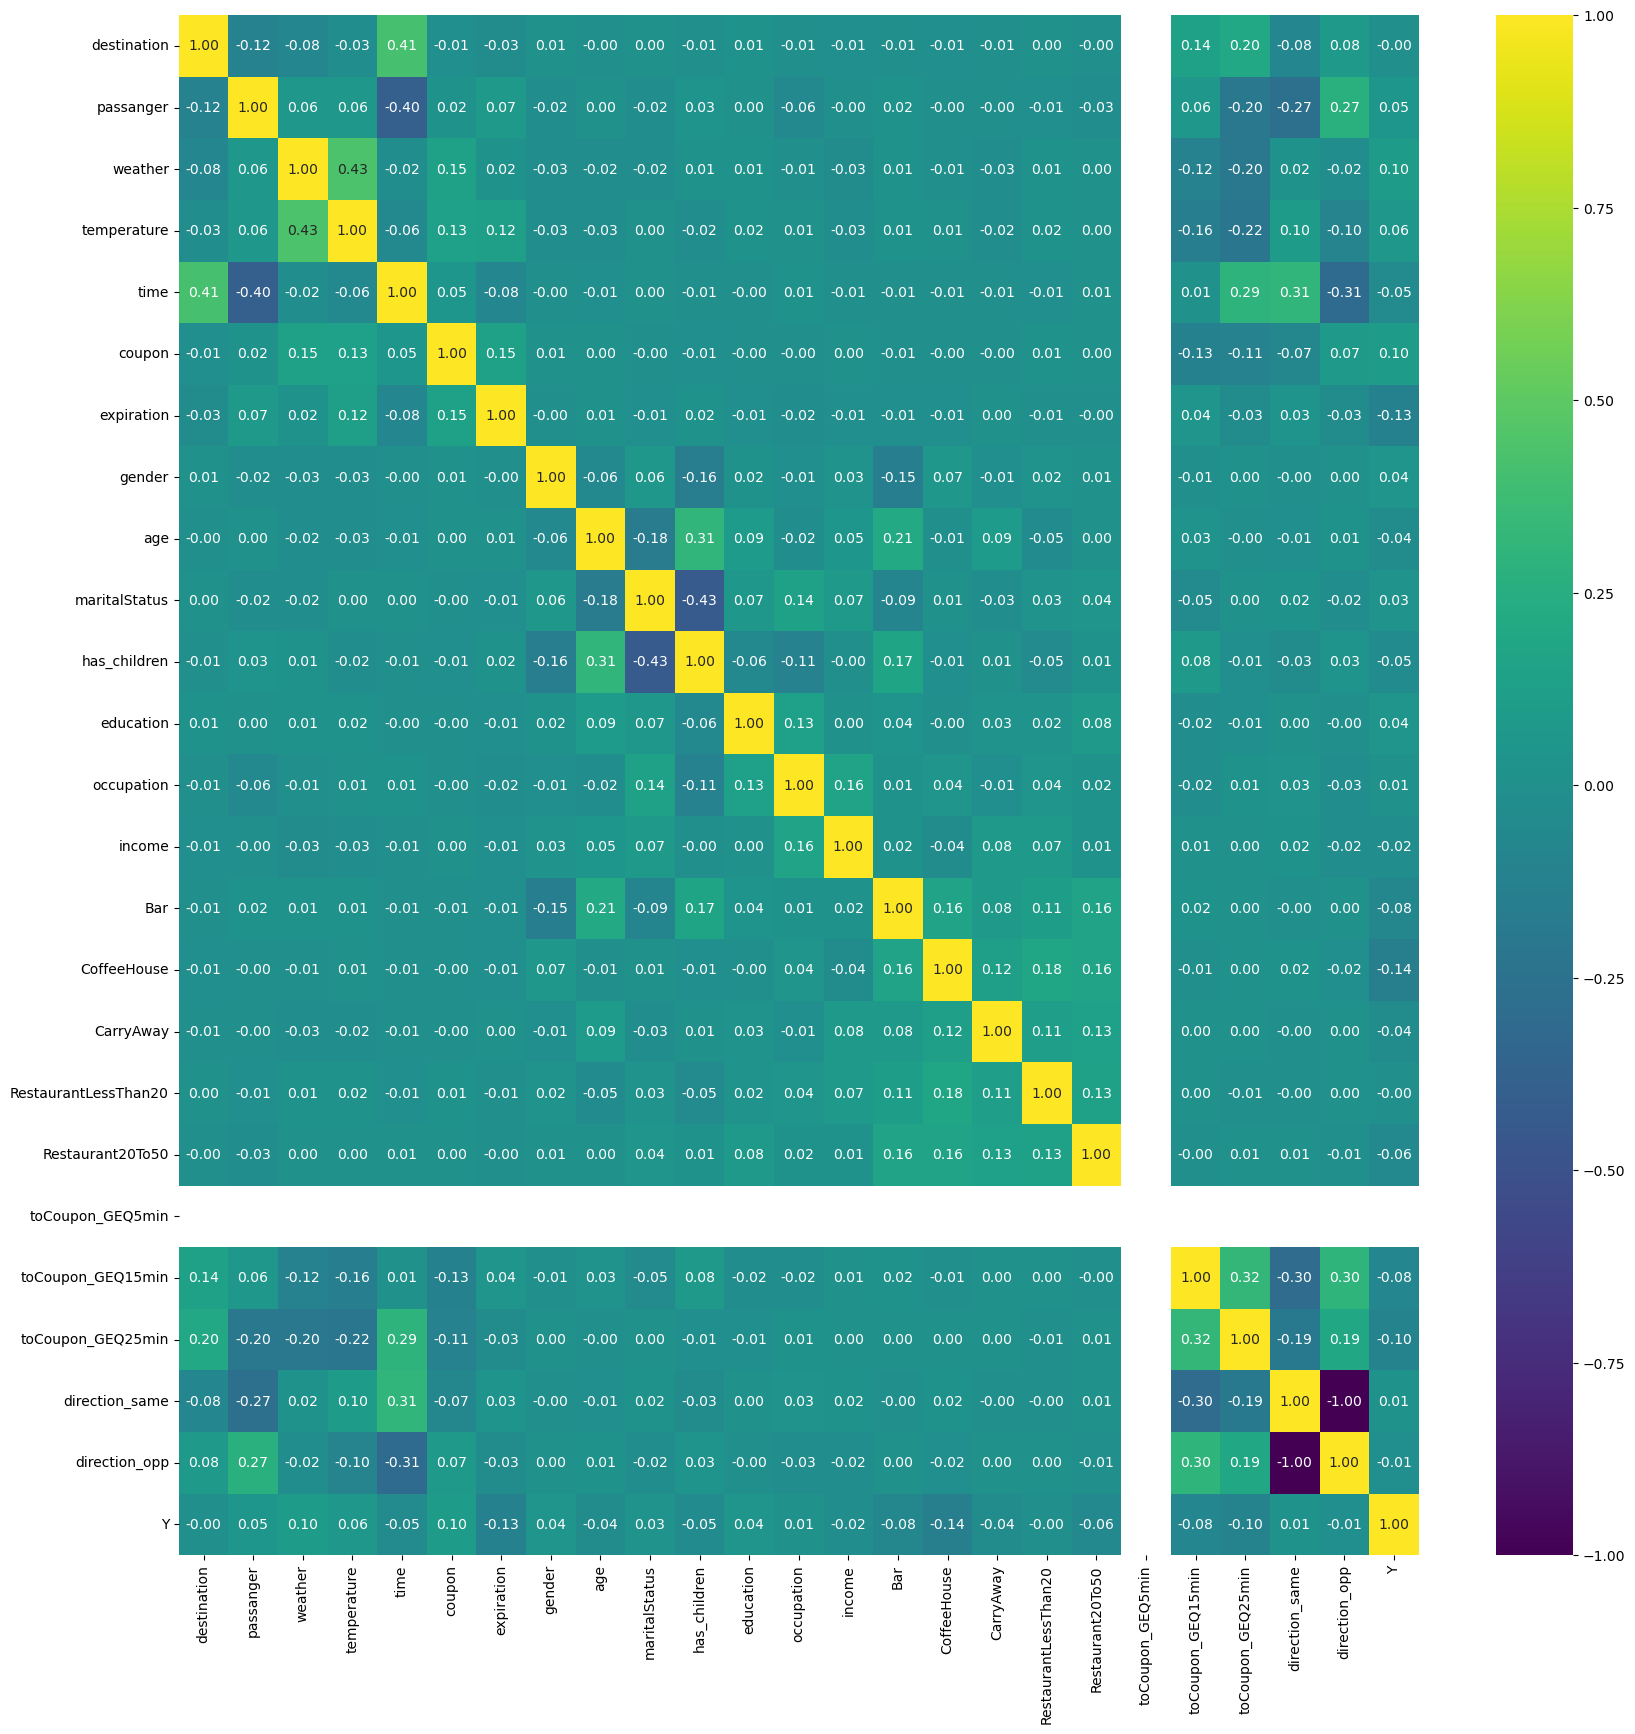

In [26]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

Because "toCoupon GEQ5min" has a very poor association with other features, it will be droppped.

In [27]:
df = df.drop('toCoupon_GEQ5min', axis = 1)

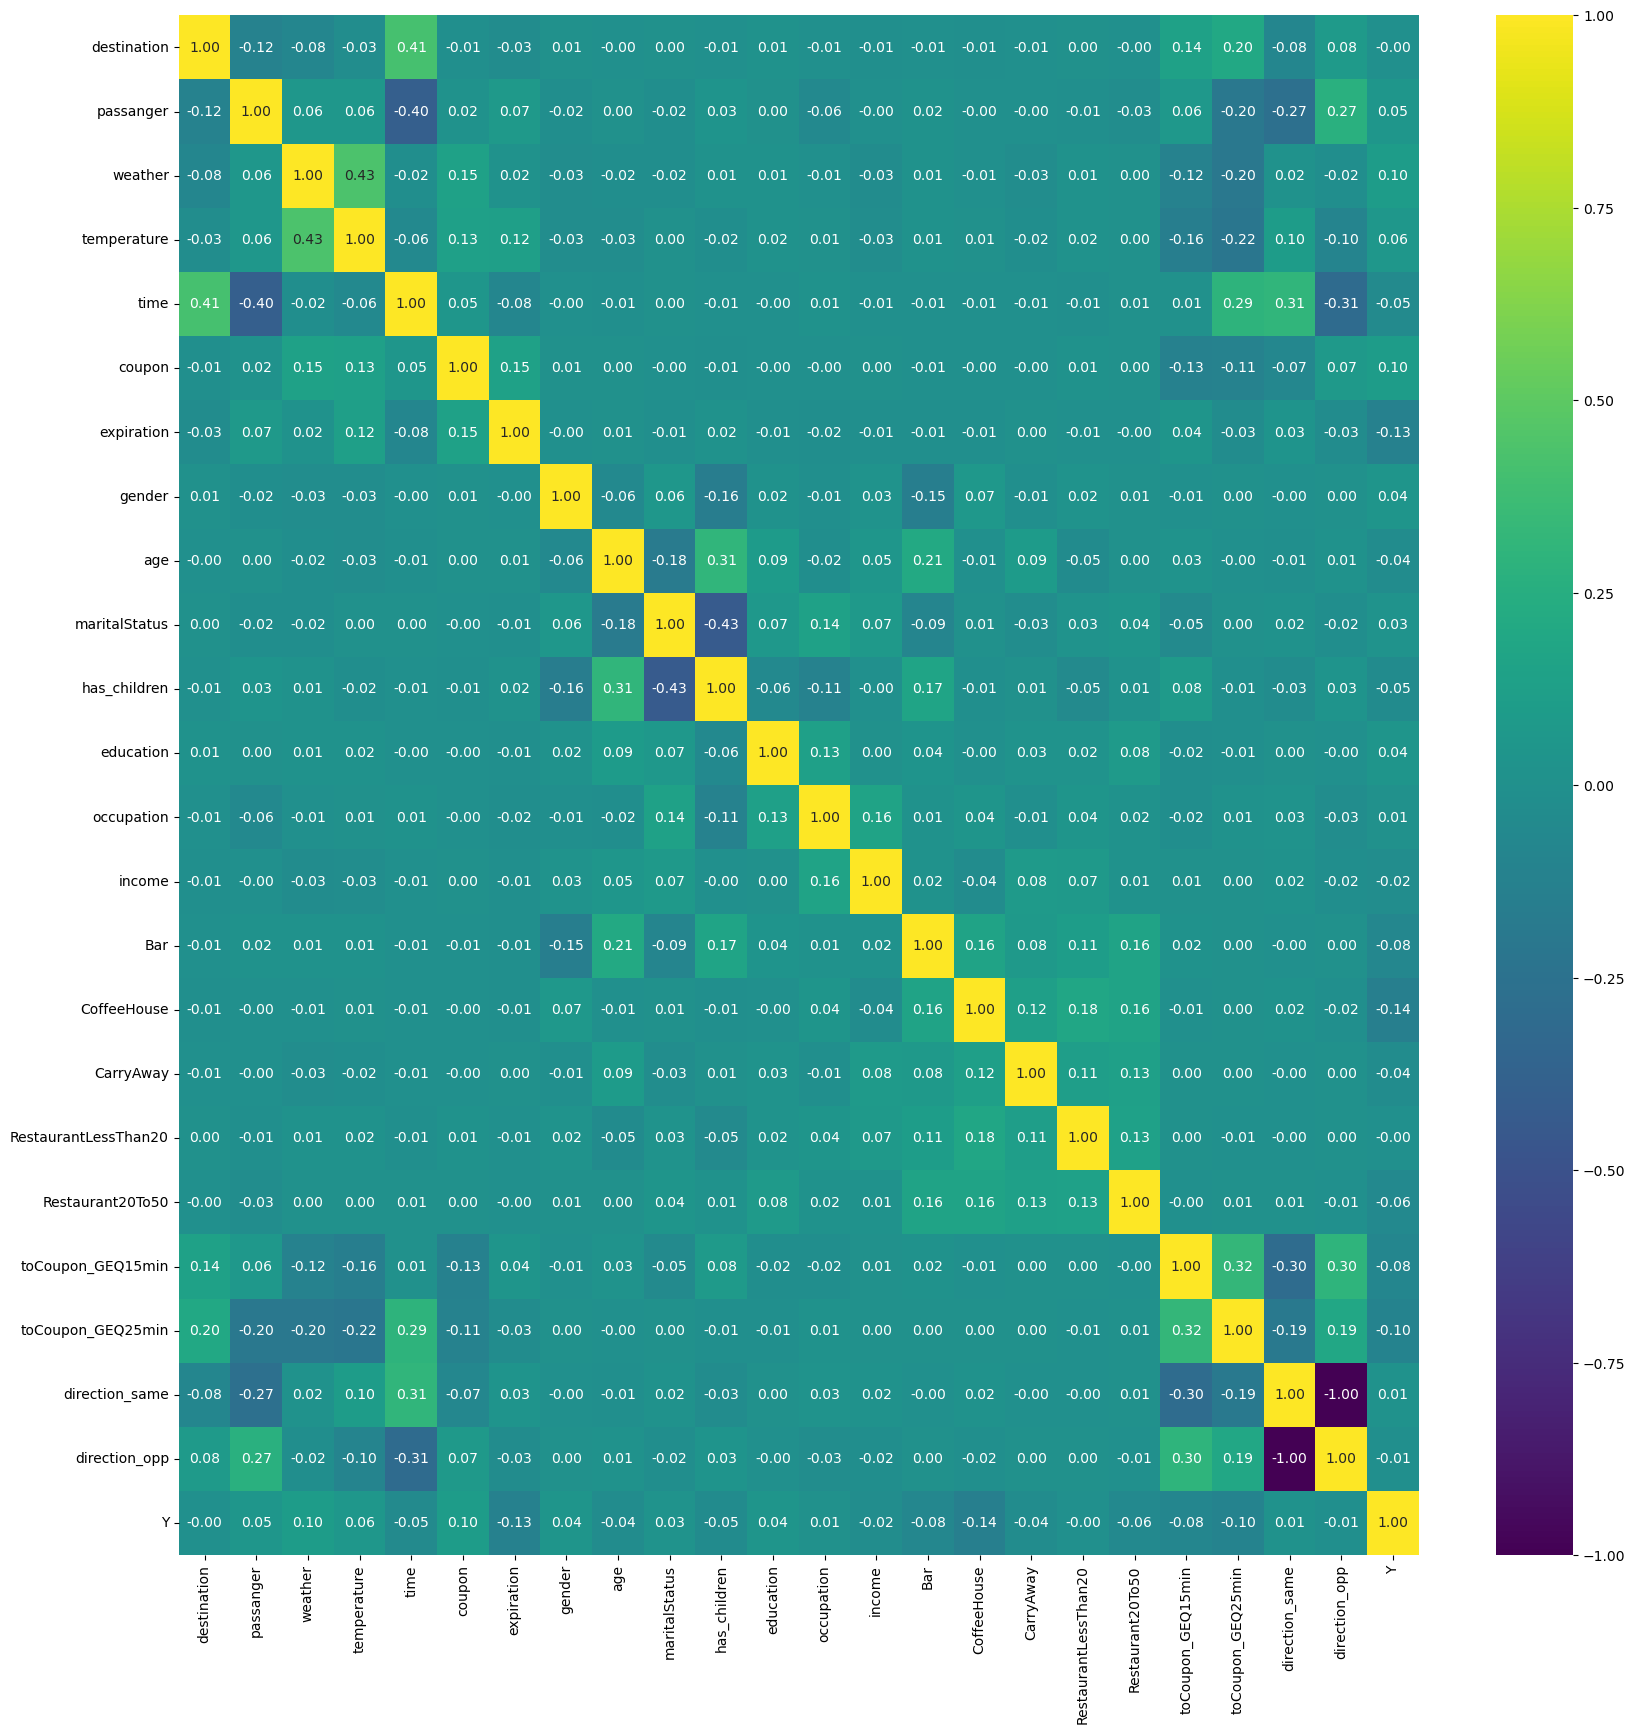

In [28]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

## Handling class imbalance

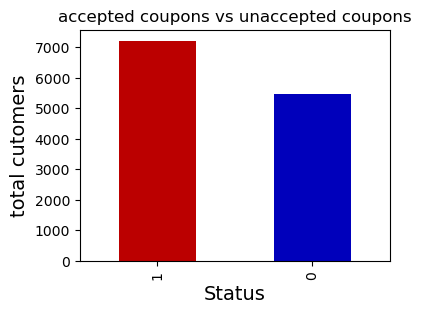

In [29]:
ax=df['Y'].value_counts().plot(kind='bar',color = ['#BB0000', '#0000BB'],
                                          title='accepted coupons vs unaccepted coupons',figsize=(4, 3))
ax.set_xlabel("Status",fontsize=14)
ax.set_ylabel("total cutomers",fontsize=14)
plt.show()

In [30]:
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

Feature Y is balanced

In [31]:
df['passanger'].value_counts()

0    7305
1    3298
3    1075
2    1006
Name: passanger, dtype: int64

In [32]:
df['time'].value_counts()

3    3230
4    3164
0    2275
2    2009
1    2006
Name: time, dtype: int64

In [33]:
df['coupon'].value_counts()

2    3996
4    2786
1    2393
0    2017
3    1492
Name: coupon, dtype: int64

In [34]:
df['gender'].value_counts()

0    6511
1    6173
Name: gender, dtype: int64

In [35]:
df['age'].value_counts()

0    2653
1    2559
2    2039
6    1788
3    1319
4    1093
5     686
7     547
Name: age, dtype: int64

In [36]:
df['maritalStatus'].value_counts()

1    5100
2    4752
3    2186
0     516
4     130
Name: maritalStatus, dtype: int64

In [37]:
df['has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

## Handling duplicates

In [38]:
df.duplicated().sum()

74

In [39]:
df = df.drop_duplicates()

In [40]:
df.duplicated().sum()

0

## Handling outliers

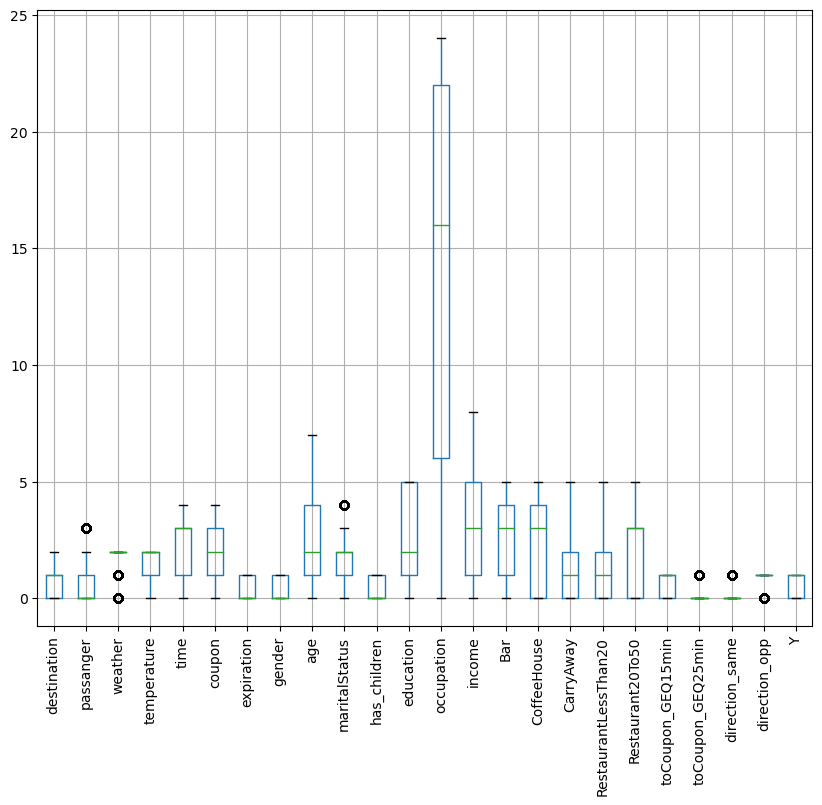

In [41]:
df.boxplot( figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

In [42]:
pd.set_option('display.max_columns', None)
df.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,0.990801,0.674148,1.698573,1.330690,2.230531,2.054084,0.442427,0.486994,2.596114,1.710944,0.414512,2.589294,14.311499,3.300397,2.642982,2.137034,1.133307,1.098414,2.284853,0.559794,0.116019,0.215543,0.784457,0.567565
std,0.709259,0.941886,0.633438,0.766135,1.438425,1.349154,0.496694,0.499851,2.225206,0.833673,0.492657,1.883092,7.994716,2.459379,1.563997,1.578998,1.166485,1.222196,1.516526,0.496432,0.320260,0.411215,0.411215,0.495434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,16.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,5.000000,22.000000,5.000000,4.000000,4.000000,2.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000,7.000000,4.000000,1.000000,5.000000,24.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Outliers are not carried out because the data of all features are categorical

# Data splitting

In [43]:
X = df.drop('Y', axis = 1)
Y = df['Y']

X = X.to_numpy()
Y = Y.to_numpy()

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [45]:
x_train.shape

(8827, 23)

In [46]:
x_test.shape

(3783, 23)

In [47]:
y_train.shape

(8827,)

In [48]:
y_test.shape

(3783,)

## Model Testing

In [49]:
import sklearn.linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import math
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, classification_report
%matplotlib inline

In [50]:
def modelTesting(model):
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print("{}Accuracy on training set: {:.3f}".format(model, model.score(x_train, y_train)))
    print("{}Accuracy on test set: {:.3f}\n".format(model, model.score(x_test, y_test)))
    model_y_pred = model.predict(x_test)
    model_cf_rep = classification_report(y_test, model_y_pred)
    print(model_cf_rep)
    plot_confusion_matrix(model, x_test, y_test)  
    plt.title('{} Confusion Matrix'.format(model))
    plt.show()
    model_train_sizes, model_train_scores, model_test_scores =learning_curve(model, X, Y, scoring='accuracy',n_jobs=-1)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x=model_train_sizes,y= model_train_scores.mean(axis=1), color='b')
    ax.scatter(x=model_train_sizes,y= model_test_scores.mean(axis=1), color='r')
    ax.plot(model_train_sizes,model_train_scores.mean(axis=1), color='b')
    ax.plot(model_train_sizes,model_test_scores.mean(axis=1), color='r')
    ax.set_xlabel('Data Range')
    ax.set_ylabel('Accuracy')
    ax.set_title('Learning Curve for {}'.format(model))
    plt.legend(['Train','Test'],loc="best")
    plt.show()

### Logistic Regression

In [51]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for sol in solvers:
    logit = LogisticRegression(random_state=42,solver=sol, max_iter=10000).fit(x_train, y_train)
    print(sol + ': ' +str(logit.score(x_test, y_test)))

newton-cg: 0.6352101506740682
lbfgs: 0.6354744911445942
liblinear: 0.6352101506740682
sag: 0.6352101506740682
saga: 0.6352101506740682


LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')Accuracy on training set: 0.627
LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')Accuracy on test set: 0.635

              precision    recall  f1-score   support

           0       0.62      0.44      0.51      1654
           1       0.64      0.79      0.71      2129

    accuracy                           0.64      3783
   macro avg       0.63      0.61      0.61      3783
weighted avg       0.63      0.64      0.62      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


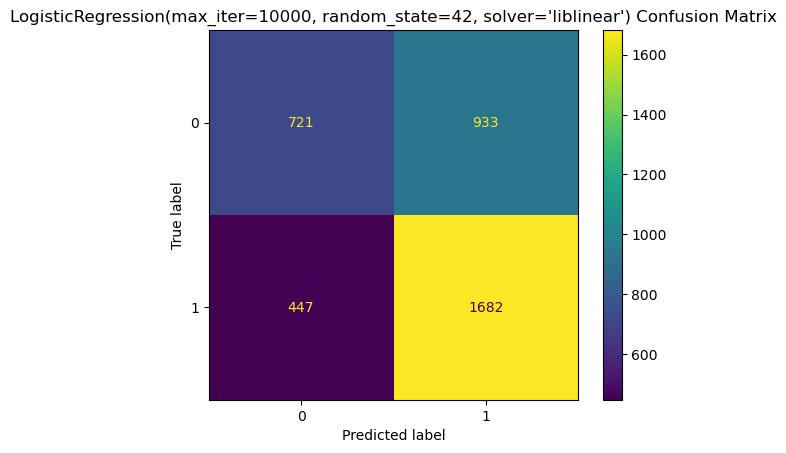

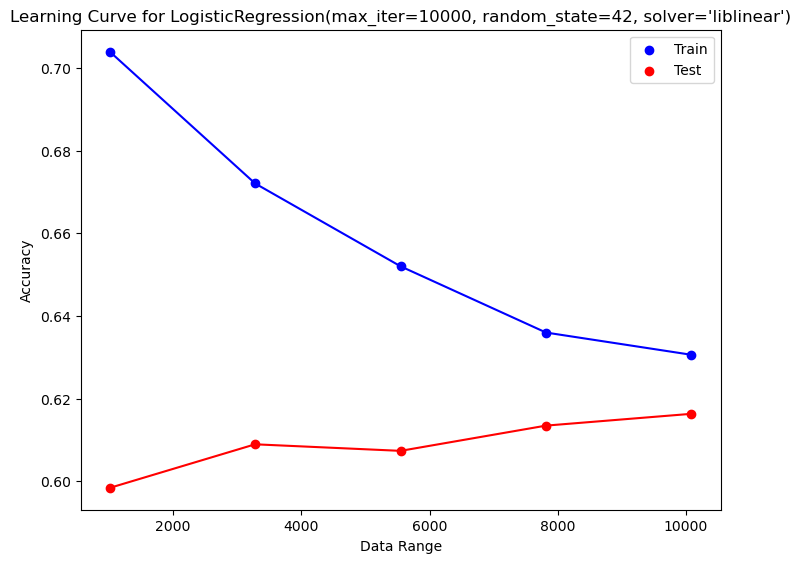

In [52]:
logit = LogisticRegression(random_state=42,solver='liblinear', max_iter=10000)
logit.fit(x_train, y_train)
modelTesting(logit)

### Random Forest

RandomForestClassifier(class_weight='balanced', random_state=42)Accuracy on training set: 0.999
RandomForestClassifier(class_weight='balanced', random_state=42)Accuracy on test set: 0.741

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      1654
           1       0.75      0.81      0.78      2129

    accuracy                           0.74      3783
   macro avg       0.74      0.73      0.73      3783
weighted avg       0.74      0.74      0.74      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


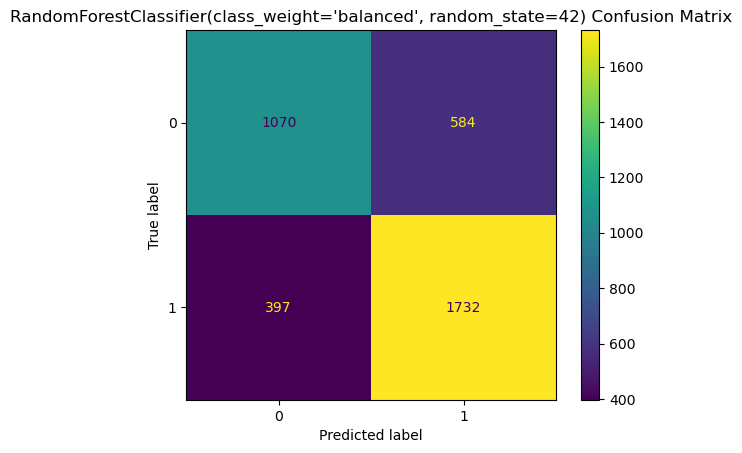

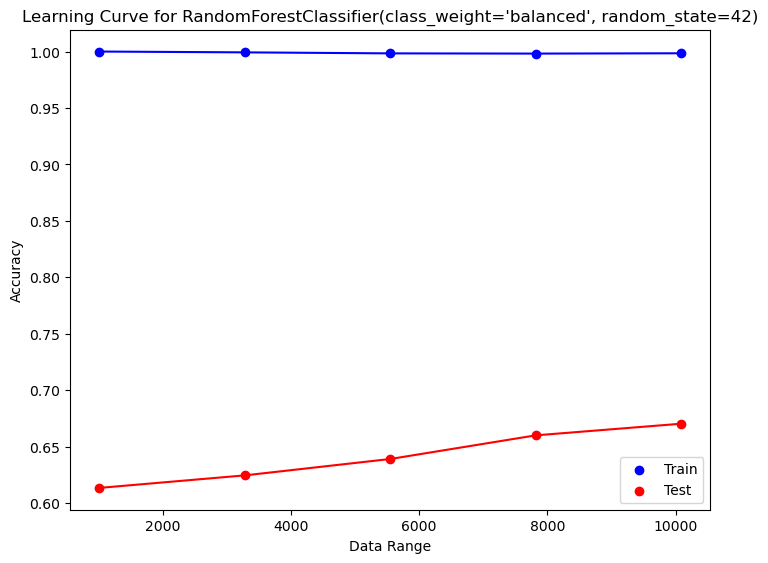

In [53]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(x_train, y_train)
modelTesting(rf)

### K-Nearest Neighbor

KNeighborsClassifier()Accuracy on training set: 0.765
KNeighborsClassifier()Accuracy on test set: 0.626

              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1654
           1       0.66      0.70      0.68      2129

    accuracy                           0.63      3783
   macro avg       0.62      0.62      0.62      3783
weighted avg       0.62      0.63      0.62      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


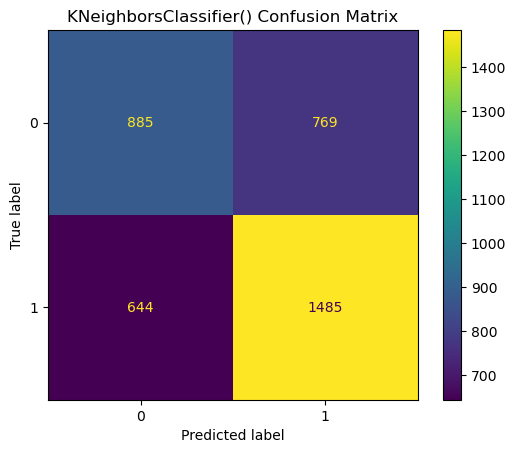

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


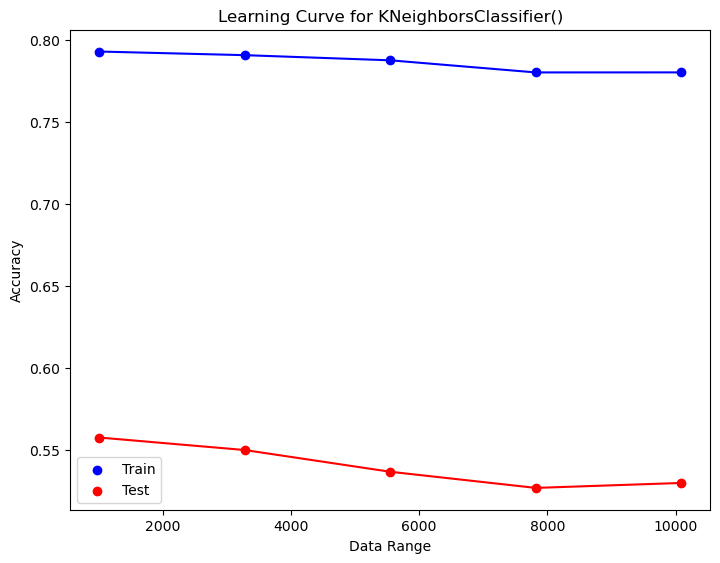

In [54]:
knn = KNeighborsClassifier().fit(x_train, y_train)
modelTesting(knn)

### Decision Tree

DecisionTreeClassifier(class_weight='balanced', random_state=42)Accuracy on training set: 0.999
DecisionTreeClassifier(class_weight='balanced', random_state=42)Accuracy on test set: 0.675

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1654
           1       0.71      0.71      0.71      2129

    accuracy                           0.67      3783
   macro avg       0.67      0.67      0.67      3783
weighted avg       0.67      0.67      0.67      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


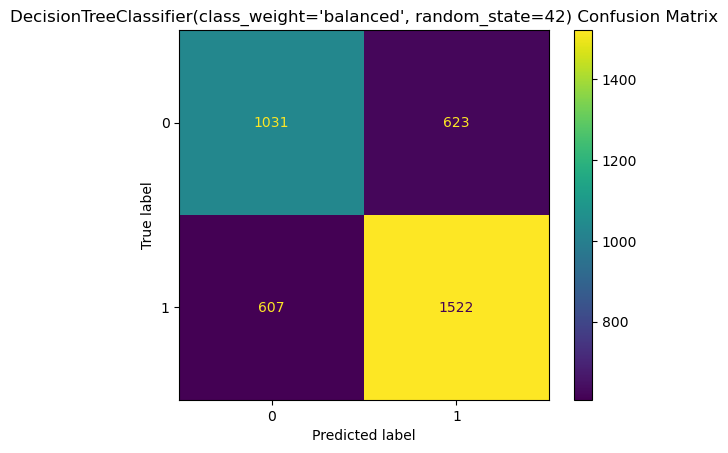

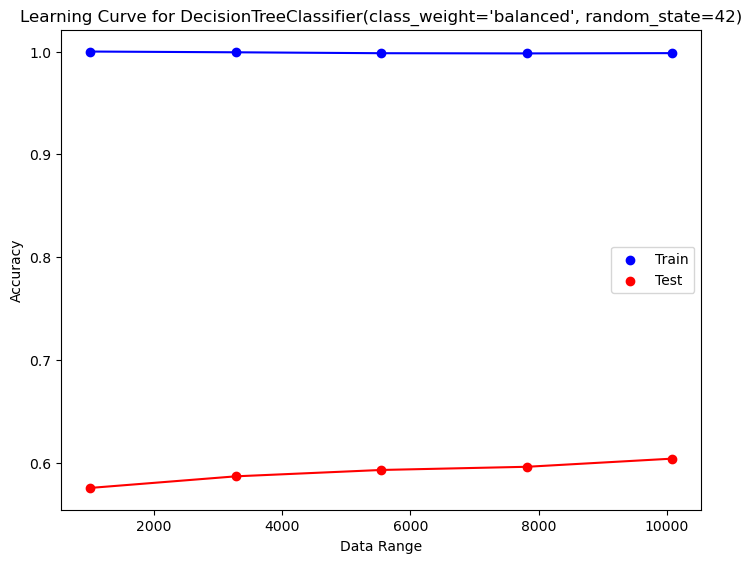

In [55]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced').fit(x_train, y_train)
modelTesting(dt)

### Support Vector Machine

SVC(random_state=0)Accuracy on training set: 0.645
SVC(random_state=0)Accuracy on test set: 0.631

              precision    recall  f1-score   support

           0       0.63      0.37      0.47      1654
           1       0.63      0.83      0.72      2129

    accuracy                           0.63      3783
   macro avg       0.63      0.60      0.59      3783
weighted avg       0.63      0.63      0.61      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


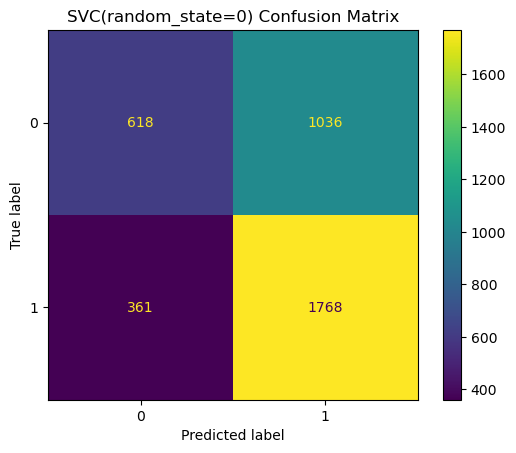

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


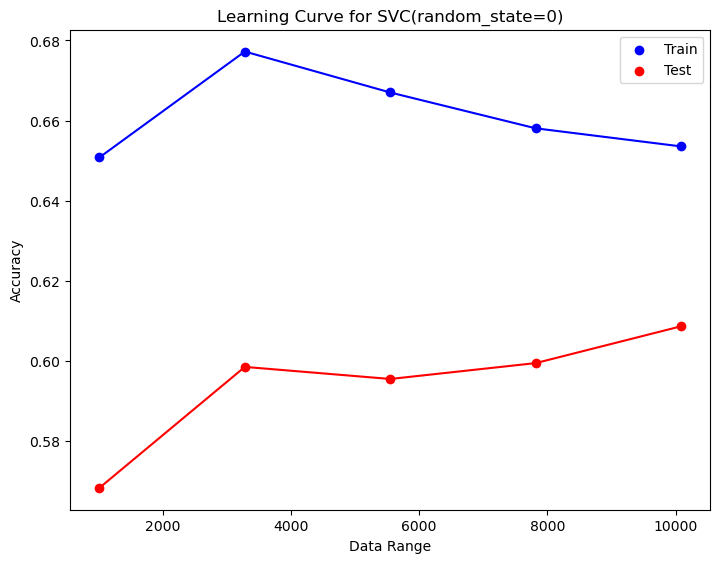

In [56]:
SVM = SVC(random_state=0).fit(x_train, y_train)
modelTesting(SVM)

### CatBoost

In [57]:
from catboost import CatBoostClassifier

<catboost.core.CatBoostClassifier object at 0x7fb6e92d0fa0>Accuracy on training set: 0.858
<catboost.core.CatBoostClassifier object at 0x7fb6e92d0fa0>Accuracy on test set: 0.751

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1654
           1       0.75      0.84      0.79      2129

    accuracy                           0.75      3783
   macro avg       0.75      0.74      0.74      3783
weighted avg       0.75      0.75      0.75      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


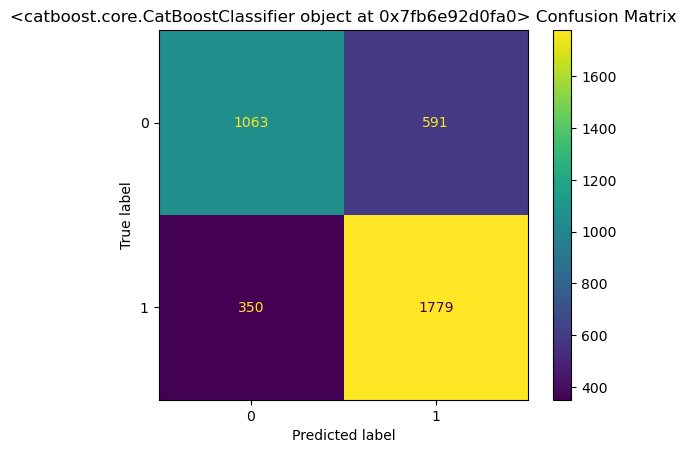

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


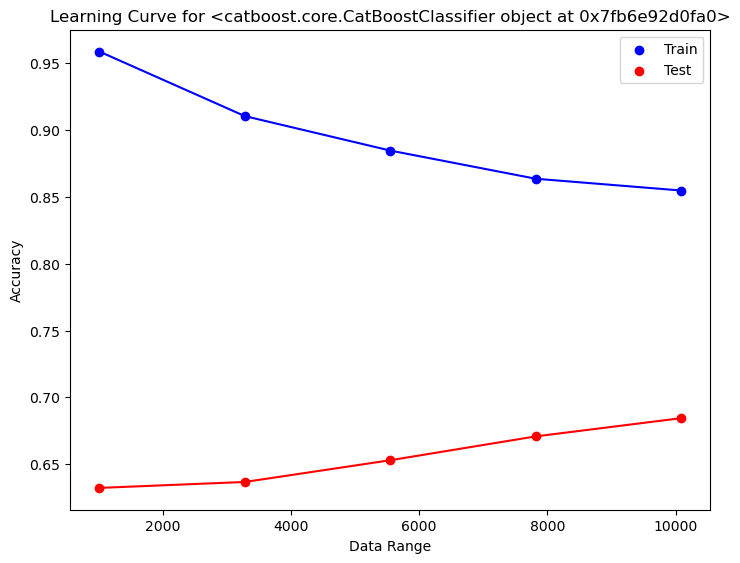

In [58]:
cb = CatBoostClassifier(random_state=42, verbose=False).fit(x_train, y_train)
modelTesting(cb)

### XGBoost

In [59]:
from xgboost import XGBClassifier

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)Accuracy on training set: 0.937
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


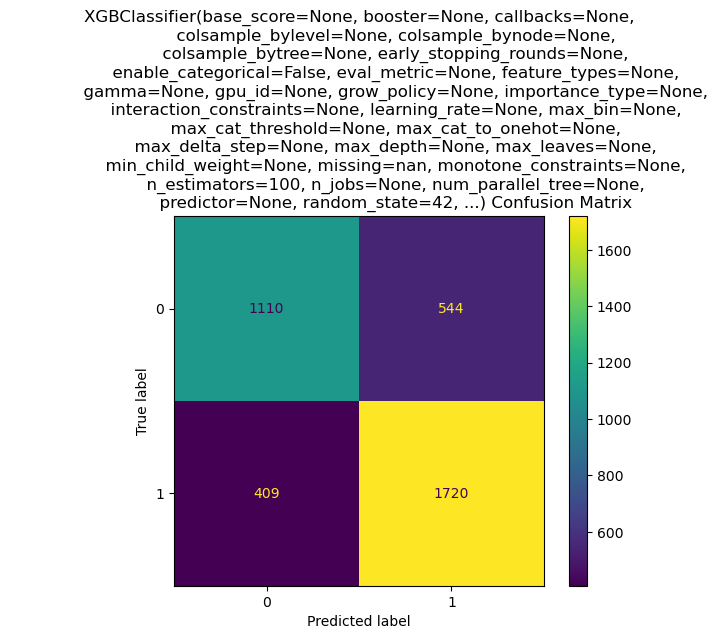

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


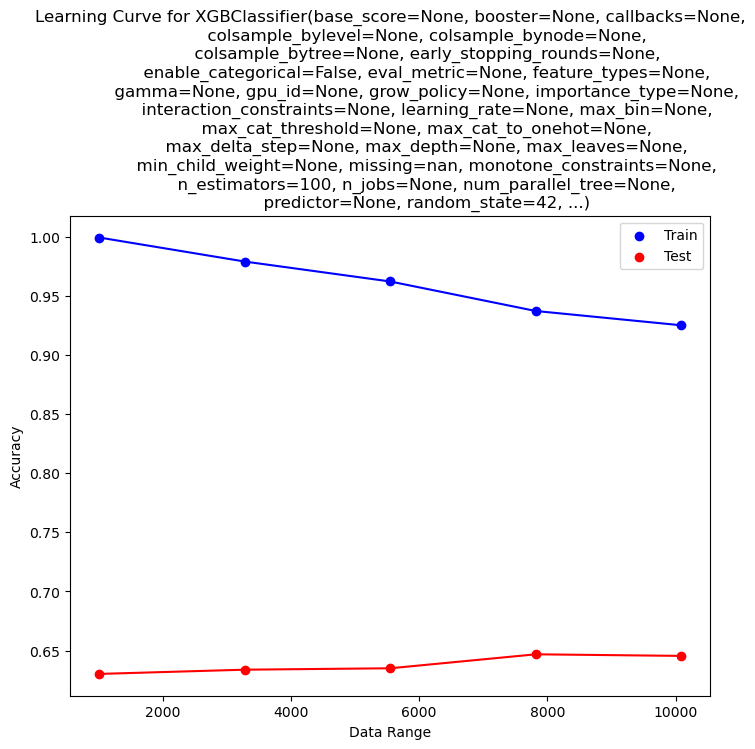

In [60]:
xg = XGBClassifier(random_state=42, use_label_encoder=False).fit(x_train, y_train)
modelTesting(xg)

### AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier(random_state=42)Accuracy on training set: 0.685
AdaBoostClassifier(random_state=42)Accuracy on test set: 0.686

              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1654
           1       0.70      0.78      0.74      2129

    accuracy                           0.69      3783
   macro avg       0.68      0.67      0.67      3783
weighted avg       0.68      0.69      0.68      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


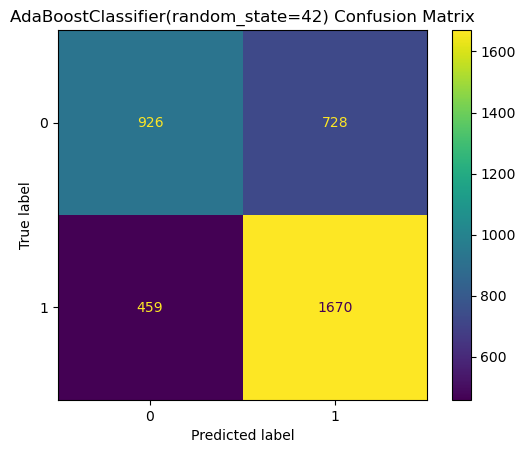

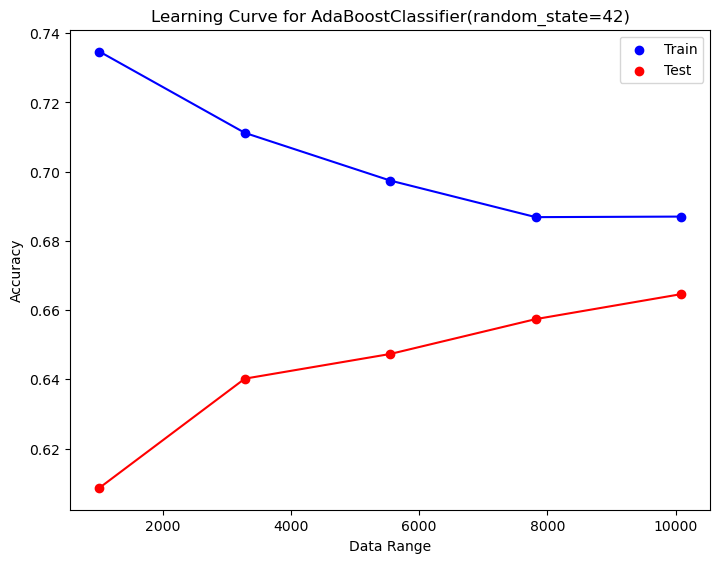

In [62]:
ad = AdaBoostClassifier(random_state=42).fit(x_train, y_train)
modelTesting(ad)

## Results Before

In [63]:
models = [logit, rf, knn, dt, SVM, cb, xg, ad]
indicies = ['Logistic Regression','Random Forest','K-Nearest Neighbor','Decision Tree', 'Support Vector Machine', 'CatBoost', 'XGBoost', 'AdaBoost']

In [64]:
def get_score(models,indices):
    scores = []
    for model in models:
        y_pred = model.predict(x_test)
        model_train_test_score = [model.score(x_train, y_train), model.score(x_test, y_test)]
        scores.append (model_train_test_score)
    df = pd.DataFrame(data=scores,columns=['Training','Testing'],index=indices)
    return df

In [65]:
results = get_score(models,indicies)

In [66]:
print(results)

                        Training   Testing
Logistic Regression     0.626600  0.635210
Random Forest           0.999207  0.740682
K-Nearest Neighbor      0.764699  0.626487
Decision Tree           0.999207  0.674861
Support Vector Machine  0.645180  0.630716
CatBoost                0.857936  0.751256
XGBoost                 0.937125  0.748084
AdaBoost                0.685057  0.686228


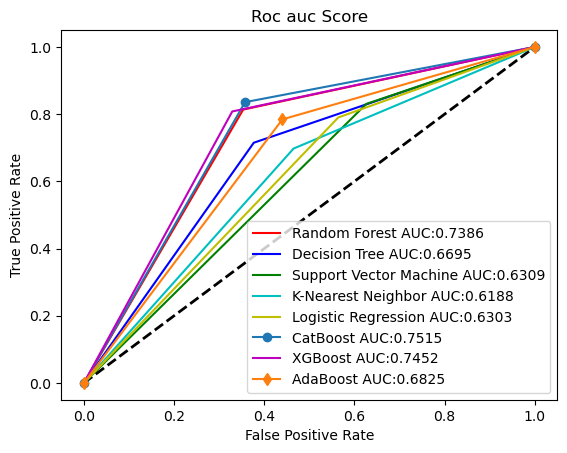

In [67]:
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")

auc = roc_auc_score(rf.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict(x_test))
plt.plot(fpr, tpr, 'r-',label ='Random Forest AUC:%.4f'%auc)

auc = roc_auc_score(dt.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict(x_test))
plt.plot(fpr, tpr, 'b-',label ='Decision Tree AUC:%.4f'%auc)

auc = roc_auc_score(SVM.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, SVM.predict(x_test))
plt.plot(fpr, tpr, 'g-',label ='Support Vector Machine AUC:%.4f'%auc)

auc = roc_auc_score(knn.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict(x_test))
plt.plot(fpr, tpr, 'c-',label ='K-Nearest Neighbor AUC:%.4f'%auc)

auc = roc_auc_score(logit.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, logit.predict(x_test))
plt.plot(fpr, tpr, 'y-',label ='Logistic Regression AUC:%.4f'%auc)

auc = roc_auc_score(cb.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, cb.predict(x_test))
plt.plot(fpr, tpr, 'o-',label ='CatBoost AUC:%.4f'%auc)

auc = roc_auc_score(xg.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, xg.predict(x_test))
plt.plot(fpr, tpr, 'm-',label ='XGBoost AUC:%.4f'%auc)

auc = roc_auc_score(ad.predict(x_test), y_test)
fpr, tpr, thresholds = roc_curve(y_test, ad.predict(x_test))
plt.plot(fpr, tpr, 'd-',label ='AdaBoost AUC:%.4f'%auc)

plt.title('Roc auc Score')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

## Models Improving

## Ensemble Learning

## Hard Voting

In [68]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('Logistic Regression', logit), ('Random Forest', rf), ('K-Nearest Neighbor', knn), ('Decision Tree', dt), ('Support Vector Machine', SVM), ('CatBoost' ,cb), ('XGBoost',xg), ('AdaBoost',ad)], voting='hard')

voting_clf.fit(x_train, y_train)

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('K-Nearest Neighbor', KNeighborsClassifier()),
                             ('Decision Tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('Support Vector Machin...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None

In [69]:
for clf in models:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6352101506740682
RandomForestClassifier 0.7406819984139572
KNeighborsClassifier 0.626486915146709
DecisionTreeClassifier 0.6748612212529739
SVC 0.6307163626751255
CatBoostClassifier 0.7512556172349987
XGBClassifier 0.7480835315886862
AdaBoostClassifier 0.6862278614855934


/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


VotingClassifier 0.7417393602960614


/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('K-Nearest Neighbor', KNeighborsClassifier()),
                             ('Decision Tree',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('Support Vector Machin...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


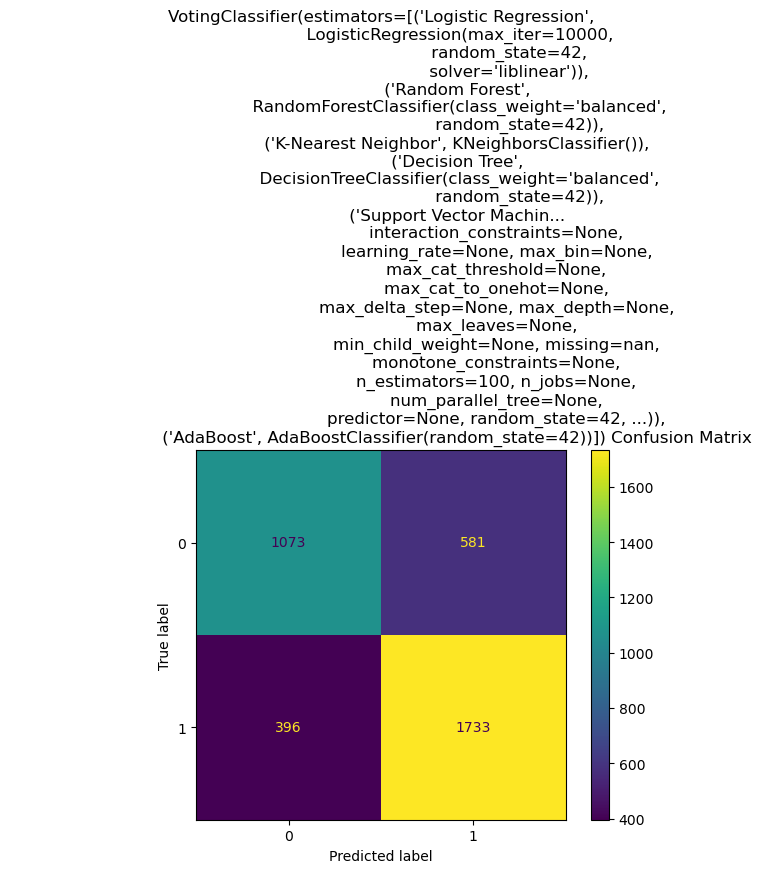

/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

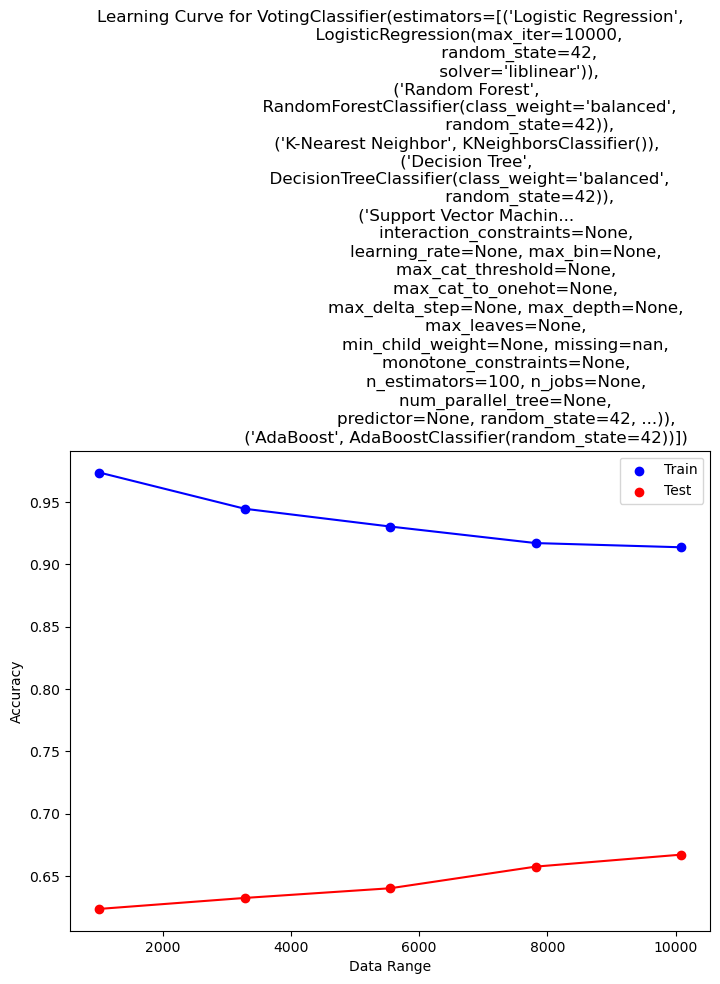

In [70]:
modelTesting(voting_clf)

## Logistic Regression Bagging

In [71]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(base_estimator= logit, n_estimators=500, 
                                max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)

In [72]:
print("Logistic Regression (Bagging) = " ,accuracy_score(y_test, y_pred))
print("Logistic Regression (Stand Alone) = ", accuracy_score(y_test, logit.predict(x_test)))

Logistic Regression (Bagging) =  0.6307163626751255
Logistic Regression (Stand Alone) =  0.6352101506740682


## Support Vector Machine Bagging

In [73]:
bagging_clf = BaggingClassifier(base_estimator= SVM, n_estimators=500, 
                                max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)

In [74]:
print("Logistic Regression (Bagging) = " ,accuracy_score(y_test, y_pred))
print("Logistic Regression (Stand Alone) = ", accuracy_score(y_test, SVM.predict(x_test)))

Logistic Regression (Bagging) =  0.5627808617499339
Logistic Regression (Stand Alone) =  0.6307163626751255


## Decision Tree Bagging

In [75]:
bagging_clf = BaggingClassifier(base_estimator= dt, n_estimators=500, 
                                max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)

In [76]:
print("Descision Tree (Bagging) = " ,accuracy_score(y_test, y_pred))
print("Descision Tree (Stand Alone) = ", accuracy_score(y_test, dt.predict(x_test)))

Descision Tree (Bagging) =  0.6735395189003437
Descision Tree (Stand Alone) =  0.6748612212529739


## Logistic Regression Boosting

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(logit, n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)
y_pred_ada = ada_clf.predict(x_test)

In [78]:
print("AdaBoost Classifier = ", accuracy_score(y_test, y_pred_ada))
print("Logistic Regression (Stand Alone) = ", accuracy_score(y_test, logit.predict(x_test)))
print("The model is better by: {}".format(accuracy_score(y_test, y_pred_ada) - (accuracy_score(y_test, logit.predict(x_test)))))

AdaBoost Classifier =  0.6367961934972244
Logistic Regression (Stand Alone) =  0.6352101506740682
The model is better by: 0.0015860428231562196


## Decision Tree Boosting

In [79]:
ada_clf = AdaBoostClassifier(dt, n_estimators=200, learning_rate=0.5, random_state=42)
ada_clf.fit(x_train, y_train)
y_pred_ada = ada_clf.predict(x_test)

In [80]:
print("AdaBoost Classifier = ", accuracy_score(y_test, y_pred_ada))
print("Descision Tree (Stand Alone) = ", accuracy_score(y_test, dt.predict(x_test)))
print("The model is better by: {}".format(accuracy_score(y_test, y_pred_ada) - (accuracy_score(y_test, dt.predict(x_test)))))

AdaBoost Classifier =  0.7282579962992334
Descision Tree (Stand Alone) =  0.6748612212529739
The model is better by: 0.053396775046259504


## MinMaxScaler Logistic Regression Pipeline

In [81]:
results

,Training,Testing
Logistic Regression,0.626600,0.635210
Random Forest,0.999207,0.740682
K-Nearest Neighbor,0.764699,0.626487
Decision Tree,0.999207,0.674861
Support Vector Machine,0.645180,0.630716
CatBoost,0.857936,0.751256
XGBoost,0.937125,0.748084
AdaBoost,0.685057,0.686228


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Logistic Regression',
                 LogisticRegression(max_iter=10000, random_state=42,
                                    solver='liblinear'))])Accuracy on training set: 0.626
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Logistic Regression',
                 LogisticRegression(max_iter=10000, random_state=42,
                                    solver='liblinear'))])Accuracy on test set: 0.634

              precision    recall  f1-score   support

           0       0.62      0.43      0.51      1654
           1       0.64      0.79      0.71      2129

    accuracy                           0.63      3783
   macro avg       0.63      0.61      0.61      3783
weighted avg       0.63      0.63      0.62      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


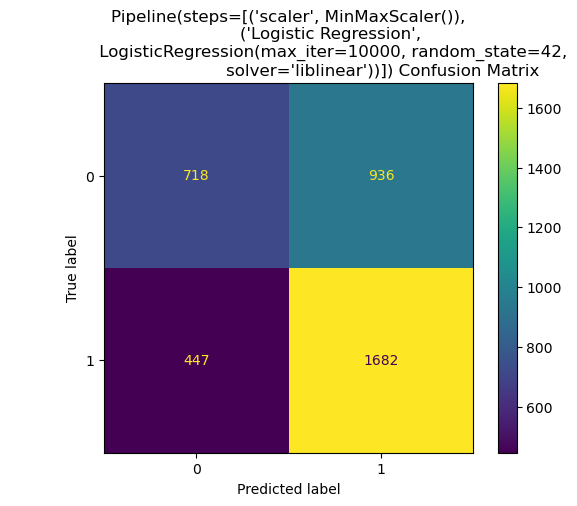

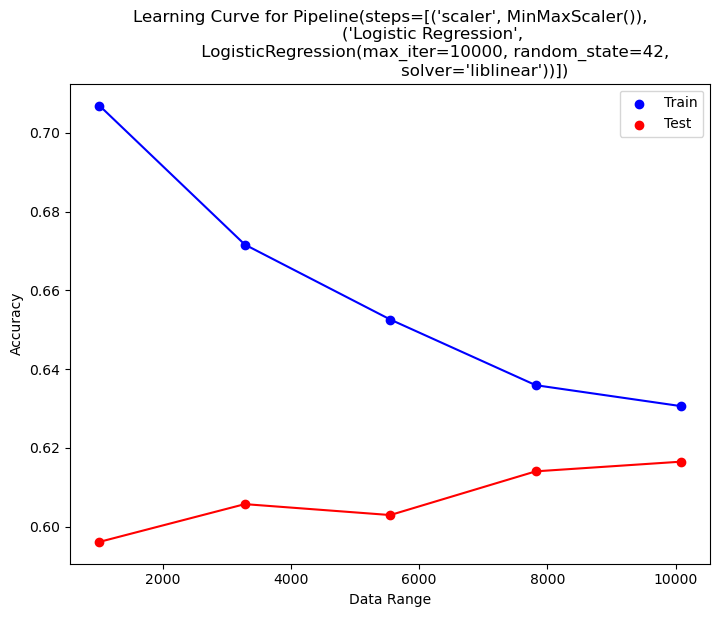

In [82]:
from sklearn.pipeline import Pipeline

PL=Pipeline([('scaler', MinMaxScaler()), ('Logistic Regression', LogisticRegression(random_state=42,solver='liblinear', max_iter=10000))])

modelTesting(PL)

## MinMaxScaler SVM Pipeline

In [83]:
results

,Training,Testing
Logistic Regression,0.626600,0.635210
Random Forest,0.999207,0.740682
K-Nearest Neighbor,0.764699,0.626487
Decision Tree,0.999207,0.674861
Support Vector Machine,0.645180,0.630716
CatBoost,0.857936,0.751256
XGBoost,0.937125,0.748084
AdaBoost,0.685057,0.686228


Pipeline(steps=[('scaler', MinMaxScaler()), ('SVC', SVC(random_state=0))])Accuracy on training set: 0.730
Pipeline(steps=[('scaler', MinMaxScaler()), ('SVC', SVC(random_state=0))])Accuracy on test set: 0.680

              precision    recall  f1-score   support

           0       0.68      0.51      0.58      1654
           1       0.68      0.81      0.74      2129

    accuracy                           0.68      3783
   macro avg       0.68      0.66      0.66      3783
weighted avg       0.68      0.68      0.67      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


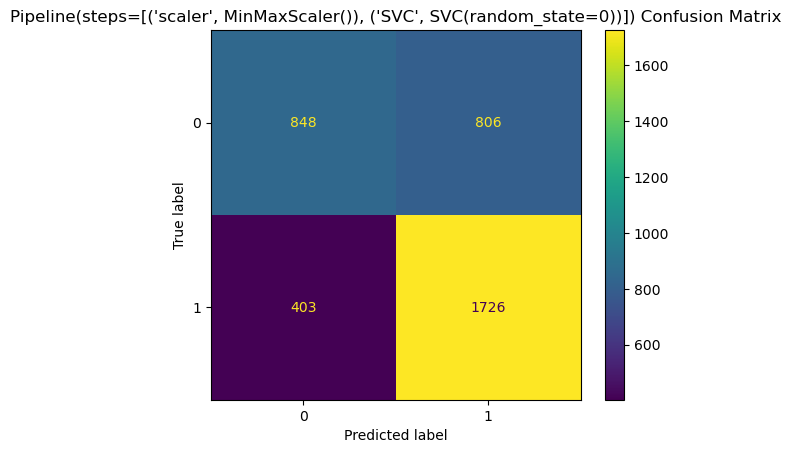

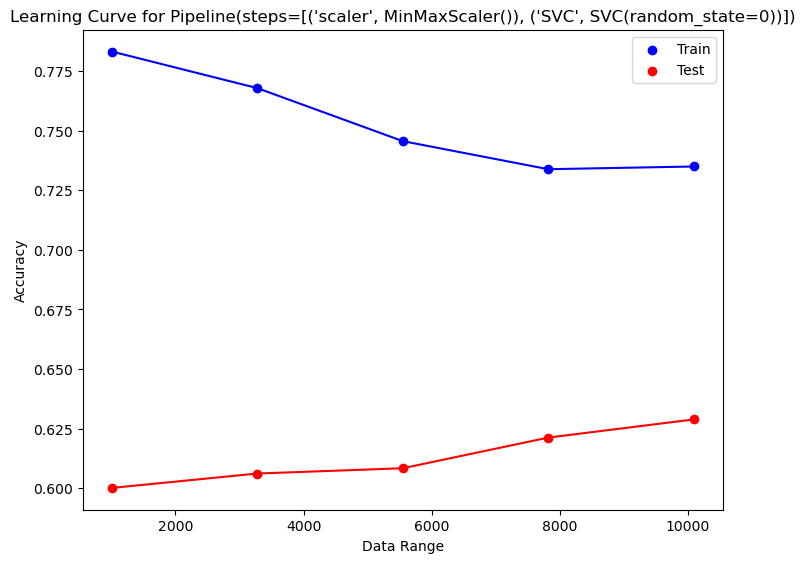

In [84]:
PL=Pipeline([('scaler', MinMaxScaler()), ('SVC', SVC(random_state=0))])

modelTesting(PL)

## MinMaxScaler Decision Tree Pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Decision Tree',
                 DecisionTreeClassifier(max_depth=7, random_state=0))])Accuracy on training set: 0.731
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Decision Tree',
                 DecisionTreeClassifier(max_depth=7, random_state=0))])Accuracy on test set: 0.697

              precision    recall  f1-score   support

           0       0.69      0.57      0.62      1654
           1       0.70      0.80      0.75      2129

    accuracy                           0.70      3783
   macro avg       0.69      0.68      0.68      3783
weighted avg       0.70      0.70      0.69      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


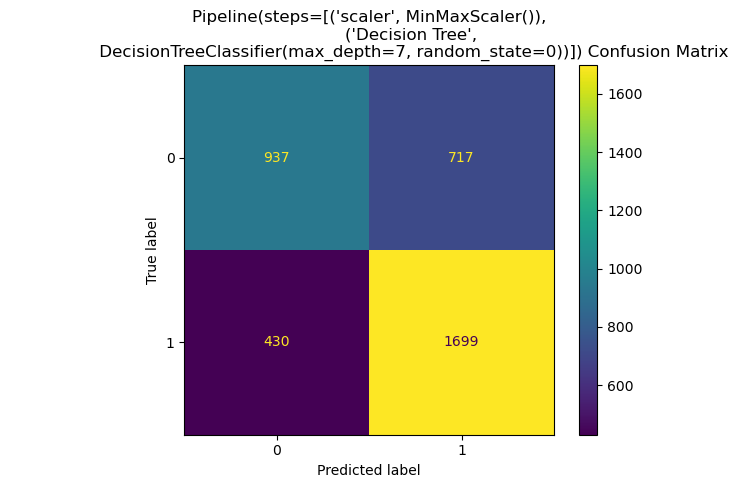

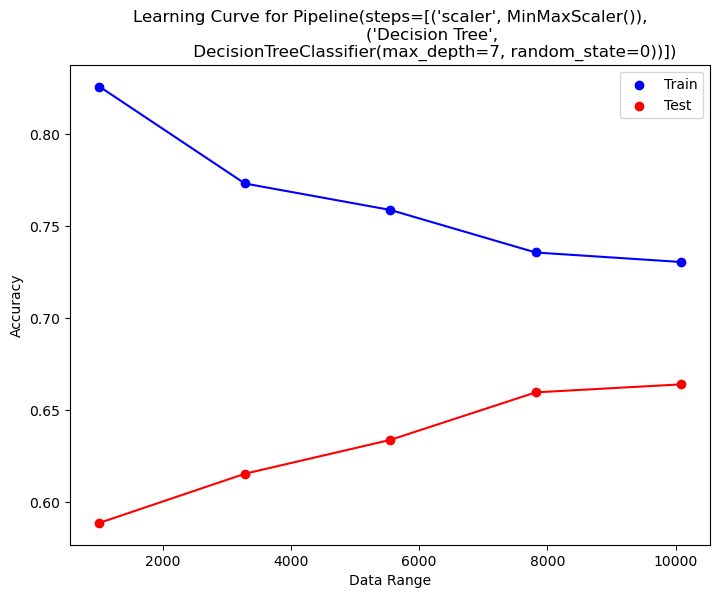

In [85]:
PL=Pipeline([('scaler', MinMaxScaler()), ('Decision Tree', DecisionTreeClassifier(max_depth=7, random_state=0))])

modelTesting(PL)

# Best Testing Score "CatBoost"

<catboost.core.CatBoostClassifier object at 0x7fb6e8dd9f10>Accuracy on training set: 0.858
<catboost.core.CatBoostClassifier object at 0x7fb6e8dd9f10>Accuracy on test set: 0.751

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1654
           1       0.75      0.84      0.79      2129

    accuracy                           0.75      3783
   macro avg       0.75      0.74      0.74      3783
weighted avg       0.75      0.75      0.75      3783



/Users/mahmoud/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


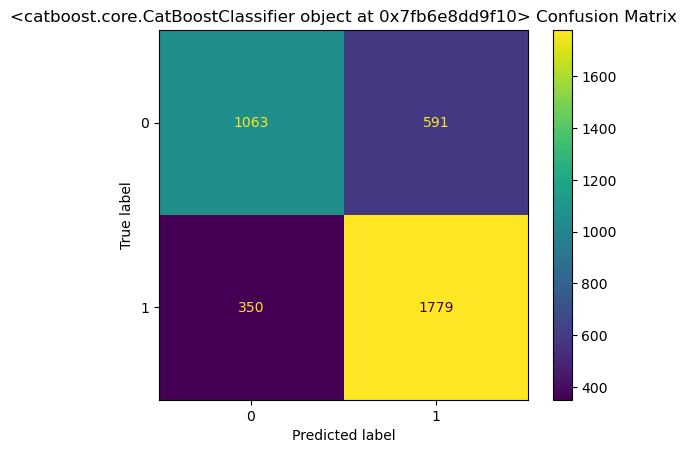

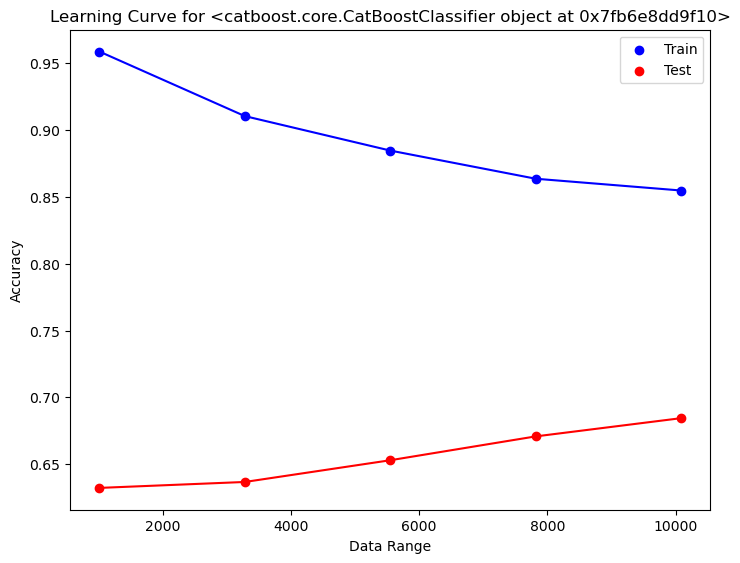

In [86]:
cb = CatBoostClassifier(random_state=42, verbose=False).fit(x_train, y_train)
modelTesting(cb)